In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (20, 20)

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
!ls

 combine_submissions.sh		    'San Juan.ipynb'
 DengAI.ipynb			     submission1.csv
'Dengue Data Visualizations.ipynb'   submission.csv
 dengue_features_test.csv	     submission_format.csv
 dengue_features_train.csv	     submission_iquitos.csv
 dengue_labels_train.csv	     submission_san_juan.csv
 Iquitos.ipynb			    'Train Data vs Test Data.ipynb'


In [4]:
X = pd.read_csv('dengue_features_train.csv')
X.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [5]:
Y = pd.read_csv('dengue_labels_train.csv')

In [6]:
san_juan_indexes = X.city == 'sj'
X = X[san_juan_indexes]
Y = Y[san_juan_indexes]

In [7]:
X.shape, Y.shape

((936, 24), (936, 4))

In [8]:
y = Y['total_cases']

In [9]:
X_and_y = pd.concat([X, y], axis=1)
X_and_y.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

## Visualizations

## Correlations

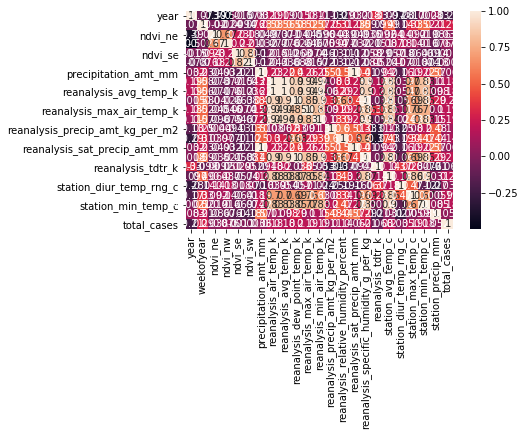

In [10]:
sns.heatmap(X_and_y.corr(), annot=True)

In [11]:
corr = X_and_y.corr()
corr = corr.reset_index()
corr.head()

,index,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,year,1.000000,-0.073143,-0.392312,-0.498367,-0.014863,-0.077928,0.031612,0.185813,0.189696,...,-0.286206,0.031612,0.018129,0.325336,-0.097312,-0.276963,-0.172907,-0.002097,0.082920,-0.212690
1,weekofyear,-0.073143,1.000000,-0.020271,-0.023549,-0.009380,-0.075804,0.231961,0.575381,0.561001,...,0.306771,0.231961,0.585224,-0.099084,0.485038,-0.137093,0.325748,0.520129,0.213336,0.287134
2,ndvi_ne,-0.392312,-0.020271,1.000000,0.673037,0.234049,0.177792,-0.048727,-0.073170,-0.071176,...,0.039138,-0.048727,-0.035235,-0.009248,0.064027,0.142875,0.092365,0.018818,-0.085993,0.037639
3,ndvi_nw,-0.498367,-0.023549,0.673037,1.000000,0.196343,0.214615,-0.032351,-0.077457,-0.076375,...,0.077339,-0.032351,-0.020595,-0.050657,0.087298,0.184124,0.136659,0.016428,-0.076237,0.075307
4,ndvi_se,-0.014863,-0.009380,0.234049,0.196343,1.000000,0.821354,-0.119386,-0.014601,-0.011905,...,-0.114294,-0.119386,-0.058442,0.029358,-0.056545,0.018121,-0.063718,-0.069275,-0.140286,0.001113


In [12]:
corr.isna().sum()

index                                    0
year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases

In [13]:
melted_corrs = corr.melt(id_vars='index')
melted_corrs.columns = ['var1', 'var2', 'corr']
melted_corrs.sort_values(by='corr', inplace=True, ascending=False)
melted_corrs.head(20)

,var1,var2,corr
0,year,year,1.0
288,reanalysis_precip_amt_kg_per_m2,reanalysis_precip_amt_kg_per_m2,1.0
72,ndvi_nw,ndvi_nw,1.0
96,ndvi_se,ndvi_se,1.0
120,ndvi_sw,ndvi_sw,1.0
144,precipitation_amt_mm,precipitation_amt_mm,1.0
152,reanalysis_sat_precip_amt_mm,precipitation_amt_mm,1.0
168,reanalysis_air_temp_k,reanalysis_air_temp_k,1.0
192,reanalysis_avg_temp_k,reanalysis_avg_temp_k,1.0
216,reanalysis_dew_point_temp_k,reanalysis_dew_point_temp_k,1.0


In [14]:
# melted_corrs[melted_corrs == 1.0]

## Correlation with total_cases 

In [15]:
total_cases_corr = X_and_y.corr()['total_cases'].reset_index()
total_cases_corr.columns = ['feature', 'corr_with_total_cases']
total_cases_corr.head()

,feature,corr_with_total_cases
0,year,-0.212690
1,weekofyear,0.287134
2,ndvi_ne,0.037639
3,ndvi_nw,0.075307
4,ndvi_se,0.001113


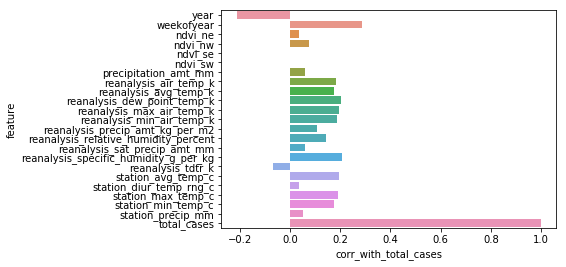

In [16]:
sns.barplot(data=total_cases_corr, y='feature', x='corr_with_total_cases')

## Transformation functions

In [17]:
ndvi_feature_names = list(filter(lambda s: s.startswith(r'ndvi'), list(X.columns)))
reanalysis_feature_names = list(filter(lambda s: s.startswith(r'reanalysis'), list(X.columns)))
station_feature_names = list(filter(lambda s: s.startswith('station'), list(X.columns)))

numerical_features = ndvi_feature_names + reanalysis_feature_names + station_feature_names

In [18]:
def remove_poorly_correlated_features(df):
    return df

def add_historical_values(df):
    historical_data = df[numerical_features].rolling(4).mean().fillna(method="bfill")
    column_rename = lambda name: 'past_' + name
    historical_data.columns = map(column_rename, historical_data.columns)
    return pd.concat([df, historical_data], axis=1)

def fill_missing_values(df):
    new_df = df.fillna(df.mean())
    return new_df

def drop_unwanted_variables(df):
    columns_to_remove = ['city', 'week_start_date', 'year']
    columns_to_remove += ['ndvi_ne', 'precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm', 'station_precip_mm']
    new_df = df.drop(columns=columns_to_remove)
    return new_df

def apply_all_transformations(df):
    df = add_historical_values(df)
    df = fill_missing_values(df)
    df = drop_unwanted_variables(df)
    return df

In [19]:
X = apply_all_transformations(X)

# Testing models 

In [20]:
def print_cross_val_scores(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
    print('MAE scores: ' + str(scores))
    average = scores.sum() / len(scores)
    print('Average MAE score: ' + str(average))
    
#     scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
#     print('MSE scores: ' + str(scores))
#     average = scores.sum() / len(scores)
#     print('Average MSE score: ' + str(average))

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
list(map(lambda x: x.shape, [X_test, X_train, y_test, y_train]))

[(234, 36), (702, 36), (234,), (702,)]

## Random Forest

In [22]:
forest = RandomForestRegressor(random_state=42, n_estimators=100)

In [23]:
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.6319633106040796

In [24]:
print_cross_val_scores(forest, X, y, cv=6)

MAE scores: [-24.36974359 -47.04826923 -30.65288462 -19.82025641 -19.02814103
 -24.55044872]
Average MAE score: -27.578290598290597


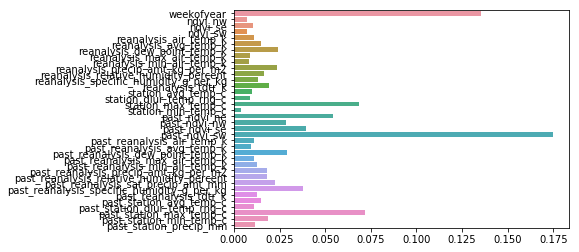

In [25]:
sns.barplot(y=X.columns, x=forest.feature_importances_)

In [26]:
forest2 = RandomForestRegressor(random_state=42, max_features=6)

In [27]:
print_cross_val_scores(forest2, X, y, cv=6)

MAE scores: [-25.69294872 -48.78461538 -31.23141026 -17.98974359 -22.30769231
 -24.7025641 ]
Average MAE score: -28.451495726495725


## Decision Tree 

In [28]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [29]:
print_cross_val_scores(tree, X, y, cv=6)

MAE scores: [-31.71153846 -54.59615385 -33.29487179 -31.15384615 -17.76282051
 -26.14102564]
Average MAE score: -32.44337606837607


In [30]:
param_grid = {
    'criterion': ['mse', 'mae'],
    'max_depth': [1, 2, 3, 5, 10, None],
    'max_features': ['auto', 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}
tree_grid = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid, n_jobs=-1)
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['mse', 'mae'], 'max_depth': [1, 2, 3, 5, 10, None], 'max_features': ['auto', 'sqrt', 'log2'], 'splitter': ['best', 'random']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
tree_grid.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

## Lasso Model

In [32]:
lasso = Lasso(random_state=42)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.1253652577523351

In [33]:
lasso_scores = cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_absolute_error')
lasso_scores

array([-31.0877992 , -39.70987648, -30.29960029, -21.3277761 ,
       -23.1428317 ])

In [34]:
print_cross_val_scores(lasso, X, y)

MAE scores: [-31.0877992  -39.70987648 -30.29960029 -21.3277761  -23.1428317 ]
Average MAE score: -29.113576753964583


In [35]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=[100, 10, 1], random_state=42)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=[100, 10, 1], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=42,
    selection='cyclic', tol=0.0001, verbose=False)

In [36]:
print_cross_val_scores(lasso_cv, X, y)

MAE scores: [-26.15920117 -39.21409834 -30.03901266 -23.55542306 -25.89274335]
Average MAE score: -28.97209571666562


## SVM

In [37]:
svr = SVR()
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [38]:
svr.score(X_train, y_train), svr.score(X_test, y_test)

(-0.06537766270586798, -0.07970502594164519)

In [39]:
print_cross_val_scores(svr, X, y, cv=10)

MAE scores: [-31.23676123 -15.46060195 -66.89360984  -8.87817621 -50.64630772
 -12.52567865 -15.83338803 -10.22989632 -20.2507575  -18.17594383]
Average MAE score: -25.013112127809492


## Gaussian Naive Bayes 

In [40]:
nb = GaussianNB()

In [41]:
print_cross_val_scores(nb, X, y)

/home/sivakar/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


MAE scores: [-44.82239382 -23.60784314 -20.64804469 -22.34177215 -26.74264706]
Average MAE score: -27.632540172621685


## Ada Boost

In [42]:
base_estimator = DecisionTreeRegressor(max_features='sqrt', max_depth=5)
ada = AdaBoostRegressor(random_state=42, n_estimators=500, learning_rate=0.00002, base_estimator=base_estimator)
print_cross_val_scores(ada, X, y)

MAE scores: [-20.31010513 -37.19504707 -29.96889021 -15.67249253 -19.7248715 ]
Average MAE score: -24.574281287803792


In [43]:
ada2 = AdaBoostRegressor(random_state=42, n_estimators=500, learning_rate=0.00001, base_estimator=LinearRegression())
print_cross_val_scores(ada2, X, y)

MAE scores: [-33.38868247 -41.85436363 -32.3996263  -25.43929859 -27.09238809]
Average MAE score: -32.034871815874496


## Gradient Boost

In [44]:
gboost = GradientBoostingRegressor(random_state=42, n_estimators=200, learning_rate=0.001)
print_cross_val_scores(gboost, X, y)

MAE scores: [-21.58873429 -38.14991341 -29.43558195 -23.15086793 -27.46437707]
Average MAE score: -27.957894930183784


# Predicting on unknown data 

In [45]:
X_new = pd.read_csv('dengue_features_test.csv')
X_new = X_new[X_new['city'] == 'sj']

In [46]:
output = pd.DataFrame()

In [47]:
output = X_new[['city', 'year', 'weekofyear']]

In [48]:
X_new = apply_all_transformations(X_new)
X_new.head()

,weekofyear,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,...,past_reanalysis_precip_amt_kg_per_m2,past_reanalysis_relative_humidity_percent,past_reanalysis_sat_precip_amt_mm,past_reanalysis_specific_humidity_g_per_kg,past_reanalysis_tdtr_k,past_station_avg_temp_c,past_station_diur_temp_rng_c,past_station_max_temp_c,past_station_min_temp_c,past_station_precip_mm
0,18,-0.018900,0.102729,0.091200,298.492857,298.550000,294.527143,301.1,296.4,25.37,...,13.3800,77.074286,23.705,16.040000,3.617857,27.146429,6.667857,32.35,22.775,28.200
1,19,-0.012400,0.082043,0.072314,298.475714,298.557143,294.395714,300.8,296.7,21.83,...,13.3800,77.074286,23.705,16.040000,3.617857,27.146429,6.667857,32.35,22.775,28.200
2,20,0.036730,0.151083,0.091529,299.455714,299.357143,295.308571,302.2,296.4,4.12,...,13.3800,77.074286,23.705,16.040000,3.617857,27.146429,6.667857,32.35,22.775,28.200
3,21,-0.019867,0.124329,0.125686,299.690000,299.728571,294.402857,303.0,296.9,2.20,...,13.3800,77.074286,23.705,16.040000,3.617857,27.146429,6.667857,32.35,22.775,28.200
4,22,0.039833,0.062267,0.075914,299.780000,299.671429,294.760000,302.3,297.3,4.36,...,8.1275,75.900000,4.245,16.094643,3.721429,27.417857,6.675000,32.35,23.175,30.425


In [49]:
model = ada

In [50]:
model.fit(X, y)
predictions = model.predict(X_new)

predictions = predictions.round()
predictions[:10]

array([15., 15., 15., 15., 14., 16., 16., 18., 21., 25.])

In [51]:
output['total_cases'] = predictions
output['total_cases'] = pd.to_numeric(output['total_cases'], downcast='integer')
output.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,15
1,sj,2008,19,15
2,sj,2008,20,15
3,sj,2008,21,15
4,sj,2008,22,14


In [52]:
output.to_csv('submission_san_juan.csv', index=False)